In [1]:
import os
os.environ['USE_PYGEOS'] = '0' 

import geopandas as gpd
from  fiona import listlayers

#mapa de Nueva Zelanda
Nueva_Zelanda='https://github.com/lizBadillo/geodfprepro/raw/main/maps/Nueva_Zelanda.gpkg'

#Las tres capas del mapa: polígonos, puntos y líneas
listlayers(Nueva_Zelanda)

['Divisiones_administ', 'Aeropuertos', 'Railroads']

In [2]:
zelanda_estados=gpd.read_file(Nueva_Zelanda,layer='Divisiones_administ')
aero=gpd.read_file(Nueva_Zelanda,layer='Aeropuertos')
railroad=gpd.read_file(Nueva_Zelanda,layer='Railroads')

In [3]:
#¿Tienen el mismo CRS?
zelanda_estados.crs.to_epsg()==railroad.crs.to_epsg()==aero.crs.to_epsg()

True

<Axes: >

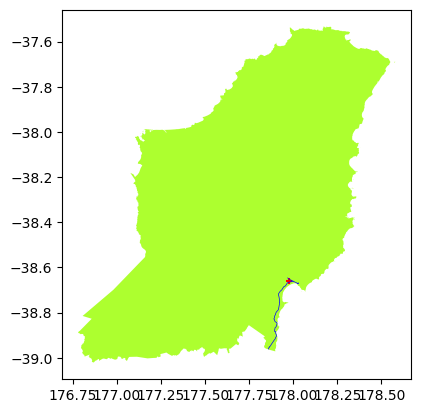

In [4]:
#Solo Gisborne
Gisborne=zelanda_estados[zelanda_estados.nam=='Gisborne']

# clipping
aero_clipped = gpd.clip(gdf=aero, mask=Gisborne)
railroad_clipped = gpd.clip(gdf=railroad,mask=Gisborne)

# plotting
base = Gisborne.plot(facecolor="greenyellow")
railroad_clipped.plot(edgecolor='blue', linewidth=0.5,ax=base)
aero_clipped.plot(marker='+', color='red', markersize=15,ax=base)

In [5]:
#Hemos comprobado que presentan el mismo CRS 
#Ejercicio 1
#Obtenemos información acerca de las unidades de medida para ver si es proyectado o no proyectado 
Gisborne.crs.axis_info

[Axis(name=Longitude, abbrev=lon, direction=east, unit_auth_code=, unit_code=, unit_name=degree),
 Axis(name=Latitude, abbrev=lat, direction=north, unit_auth_code=, unit_code=, unit_name=degree)]

In [6]:
#Nosotros queremos el centroide
Gisborne.centroid

C:\Users\lizbe\AppData\Local\Temp\ipykernel_9768\606549635.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Gisborne.centroid


364    POINT (178.04819 -38.70592)
365    POINT (178.23560 -38.57295)
366    POINT (178.29546 -38.53393)
367    POINT (178.34693 -38.39155)
368    POINT (178.34420 -38.38384)
369    POINT (178.33787 -38.34834)
370    POINT (178.33648 -38.24888)
371    POINT (178.34183 -38.21082)
372    POINT (178.38033 -38.06850)
373    POINT (177.14338 -38.03211)
374    POINT (177.13334 -38.01902)
375    POINT (177.13148 -38.00763)
376    POINT (177.14773 -37.99913)
380    POINT (177.59181 -37.85572)
381    POINT (177.59176 -37.85372)
383    POINT (178.57559 -37.69070)
384    POINT (177.79823 -37.66849)
385    POINT (177.98660 -37.56573)
386    POINT (177.98418 -37.56019)
387    POINT (177.70869 -38.31656)
dtype: geometry

In [7]:
#Asimismo, como podemos observar, son no proyectados, las unidades están en grados, para ello, debemos cambiarlo a metros
Gisborne.to_crs(3587).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [8]:
#Ahora analizaremos los controides con la versión proyectada de Gisborne
Gisborne.to_crs(3587).centroid

364    POINT (-12557649.153 -566168.019)
365    POINT (-12502368.304 -594013.513)
366    POINT (-12485736.351 -603263.469)
367    POINT (-12439958.930 -598944.338)
368    POINT (-12437974.213 -597456.675)
369    POINT (-12428285.683 -592025.958)
370    POINT (-12399755.251 -580558.253)
371    POINT (-12388339.827 -577510.825)
372    POINT (-12344140.689 -570331.753)
373    POINT (-12440608.886 -285855.085)
374    POINT (-12437695.943 -282172.717)
375    POINT (-12434581.769 -280531.222)
376    POINT (-12430765.728 -283315.130)
380    POINT (-12351890.473 -368591.714)
381    POINT (-12351325.534 -368362.626)
383    POINT (-12219484.555 -572306.635)
384    POINT (-12280911.199 -394958.584)
385    POINT (-12235592.858 -426225.141)
386    POINT (-12234235.535 -425079.491)
387    POINT (-12476916.835 -445046.335)
dtype: geometry

In [9]:
#unamos puntos 
from shapely.geometry import Point
from shapely.ops import unary_union
union_centroide= unary_union(Gisborne.to_crs(3587).centroid)

In [10]:
centroid = union_centroide.centroid

In [11]:
print(centroid)

POINT (-12393910.885750923 -470635.8741289528)


In [12]:
#convertilo en gdf
centroid_gdf=gpd.GeoSeries(centroid).to_frame()

In [13]:
type(centroid_gdf)

geopandas.geodataframe.GeoDataFrame

<Axes: >

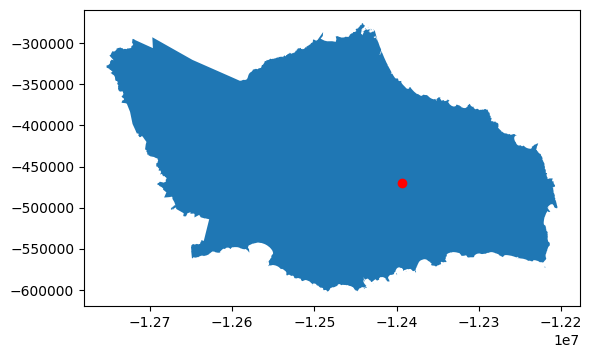

In [14]:
#Veremos los centroides:

base3587=Gisborne.to_crs(3587).plot()
centroid_gdf.plot(color='red',ax=base3587)

In [15]:
#Usamos la página web recomendada para obtener el CRS en metros adecuado 
Gisborne.to_crs(2193).crs.axis_info

[Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [16]:
#Verificamos 
Gisborne.to_crs(2193).centroid

364    POINT (2039059.795 5703743.975)
365    POINT (2056214.344 5717594.781)
366    POINT (2061684.357 5721629.540)
367    POINT (2067095.501 5737182.417)
368    POINT (2066906.555 5738052.512)
369    POINT (2066581.151 5742028.321)
370    POINT (2067099.629 5753082.055)
371    POINT (2067812.649 5757282.650)
372    POINT (2072106.013 5772893.687)
373    POINT (1963695.703 5782512.048)
374    POINT (1962879.147 5784004.782)
375    POINT (1962771.739 5785276.406)
376    POINT (1964241.298 5786156.371)
380    POINT (2004045.111 5800245.206)
381    POINT (2004050.891 5800467.235)
383    POINT (2091767.524 5813845.595)
384    POINT (2023287.313 5820120.003)
385    POINT (2040522.763 5830661.657)
386    POINT (2040341.703 5831288.907)
387    POINT (2011970.668 5748716.476)
dtype: geometry

In [17]:
#Volvemos a tener muchos puntos, usemos unary_union
union_centroide_crs= unary_union(Gisborne.to_crs(2193).centroid)

In [18]:
centroid_crs = union_centroide_crs.centroid

In [19]:
print(centroid_crs)

POINT (2031706.6927765913 5771339.231183511)


In [20]:
#convertilo en gdf
centroid_2193=gpd.GeoSeries(centroid_crs).to_frame()

<Axes: >

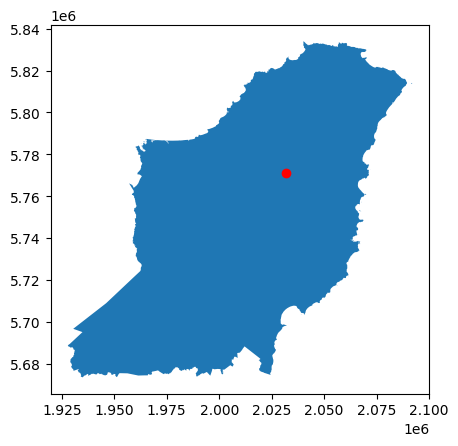

In [21]:
#Veremos los centroides:

base3587=Gisborne.to_crs(2193).plot()
centroid_2193.plot(color='red',ax=base3587)

C:\Users\lizbe\AppData\Local\Temp\ipykernel_9768\207911335.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Gisborne.centroid.plot(color='red',ax=ax2)


<Axes: title={'center': 'unprojected'}>

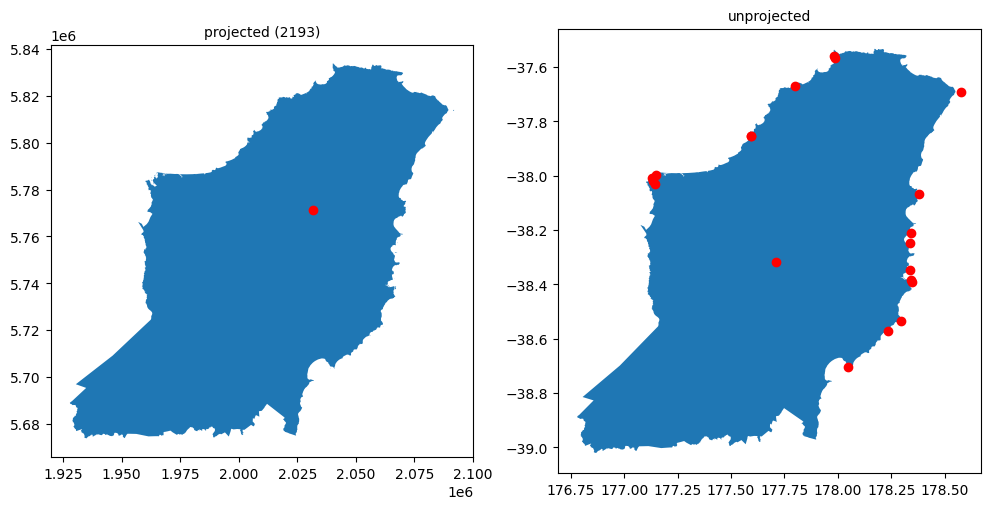

In [22]:
from matplotlib import pyplot

fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

#Proyectado con un centroide
ax1.set_title('projected (2193)',fontsize=10)
Gisborne.to_crs(2193).plot(ax=ax1)
centroid_2193.plot(color='red',ax=ax1)


#No proyectado y muchos centroides
ax2.set_title('unprojected',fontsize=10)
Gisborne.plot(ax=ax2)
Gisborne.centroid.plot(color='red',ax=ax2)

In [23]:
# just Gisborne
#Proyectamos al mismo CRS

Gisborne_2193 = Gisborne.to_crs(2193)


aero_2193=aero.to_crs(Gisborne_2193.crs)
aero_2193=aero_2193[aero_2193.nam=='Gisborne Airport']

railroads_2193=railroad.to_crs(Gisborne_2193.crs)
railroads_2193=gpd.clip(gdf=railroads_2193,mask=Gisborne_2193)

In [24]:
# Guardando
import os

Gisborne_2193.to_file(os.path.join("maps","Gisborne_2193.gpkg"), layer='Divisiones_administ', driver="GPKG")
aero_2193.to_file(os.path.join("maps","Gisborne_2193.gpkg"), layer='Aeropuertos', driver="GPKG")
railroads_2193.to_file(os.path.join("maps","Gisborne_2193.gpkg"), layer='Railroads', driver="GPKG")

In [25]:
#Ejercicio 2
Gisborne_2193

,nam,geometry
364,Gisborne,"POLYGON ((2039172.150 5703688.752, 2039005.056..."
365,Gisborne,"POLYGON ((2056434.042 5717491.502, 2056417.533..."
366,Gisborne,"POLYGON ((2061718.461 5721570.816, 2061655.179..."
367,Gisborne,"POLYGON ((2067156.138 5737170.857, 2067055.959..."
368,Gisborne,"POLYGON ((2067189.047 5737588.781, 2066921.766..."
369,Gisborne,"POLYGON ((2066598.570 5741982.067, 2066481.644..."
370,Gisborne,"POLYGON ((2067519.672 5753061.542, 2067653.247..."
371,Gisborne,"POLYGON ((2067865.216 5757193.912, 2067818.332..."
372,Gisborne,"POLYGON ((2072152.822 5772852.964, 2072102.737..."
373,Gisborne,"POLYGON ((1963910.565 5782480.134, 1963760.638..."


In [26]:
#Como podemos observar, Gisborne es un polígono, por lo tanto, cargaremos nuevos archivos para trabajar con un multipolígono
#Dejaremos el ejercicio en standby (por el momento)

In [27]:
#Ejercicio 3
NewZea_subdivision=gpd.read_file(os.path.join("maps","statsnzsubdivision-2019-clipped-generalised-SHP","subdivision-2019-clipped-generalised.shp"))
NewZea_ward=gpd.read_file(os.path.join("maps","statsnzward-2015-clipped-SHP","ward-2015-clipped.shp"))

In [28]:
NewZea_subdivision.crs,NewZea_ward.crs

(<Projected CRS: EPSG:2193>
 Name: NZGD2000 / New Zealand Transverse Mercator 2000
 Axis Info [cartesian]:
 - N[north]: Northing (metre)
 - E[east]: Easting (metre)
 Area of Use:
 - name: New Zealand - North Island, South Island, Stewart Island - onshore.
 - bounds: (166.37, -47.33, 178.63, -34.1)
 Coordinate Operation:
 - name: New Zealand Transverse Mercator 2000
 - method: Transverse Mercator
 Datum: New Zealand Geodetic Datum 2000
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich,
 <Projected CRS: EPSG:2193>
 Name: NZGD2000 / New Zealand Transverse Mercator 2000
 Axis Info [cartesian]:
 - N[north]: Northing (metre)
 - E[east]: Easting (metre)
 Area of Use:
 - name: New Zealand - North Island, South Island, Stewart Island - onshore.
 - bounds: (166.37, -47.33, 178.63, -34.1)
 Coordinate Operation:
 - name: New Zealand Transverse Mercator 2000
 - method: Transverse Mercator
 Datum: New Zealand Geodetic Datum 2000
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich)

<Axes: title={'center': 'Ward'}>

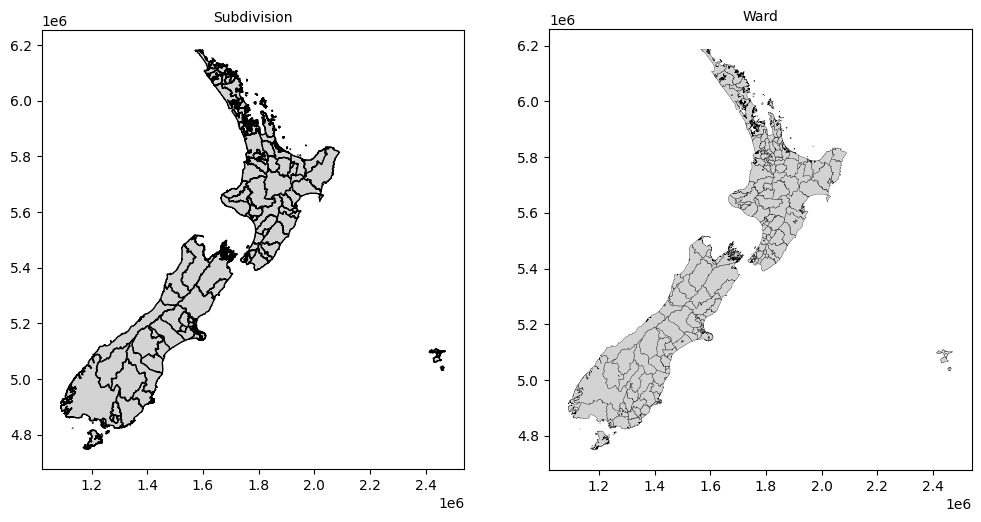

In [29]:
#Podemos observar en la línea de código anterior que sí existen los CRS y estos son proyectados (están en metros)
fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

ax1.set_title('Subdivision',fontsize=10)
NewZea_subdivision.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')

ax2.set_title('Ward',fontsize=10)
NewZea_ward.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [30]:
#Como ya existe un CRS, no es necesario darle un CRS 
#Usamos otra proyección_la adeacuada (por si acaso)
NewZea_subdivision_2193=NewZea_subdivision.to_crs(2193)
NewZea_ward_2193=NewZea_ward.to_crs(2193)

In [31]:
#Agregamos los layers
NewZea_subdivision_2193.to_file(os.path.join("maps","Nueva_Zelanda_2193.gpkg"), layer='Subdivision', driver="GPKG")
NewZea_ward_2193.to_file(os.path.join("maps","Nueva_Zelanda_2193.gpkg"), layer='Ward', driver="GPKG")

<Axes: >

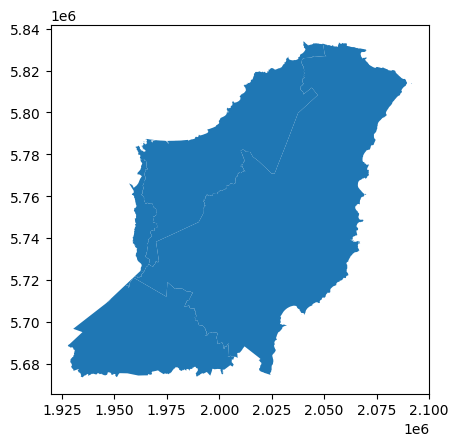

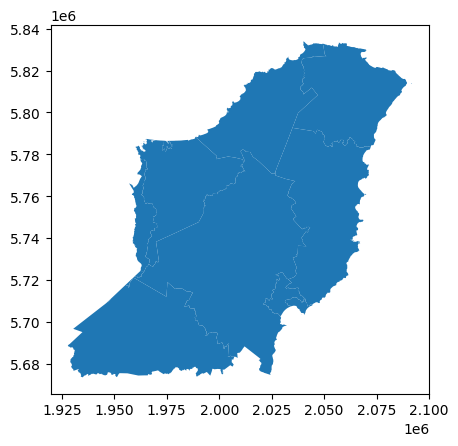

In [32]:
#Clipearemos subdivision y ward
clip_NewZea_subdivision_2193=gpd.clip(gdf=NewZea_subdivision_2193, mask=Gisborne_2193)
clip_NewZea_ward_2193=gpd.clip(gdf=NewZea_ward_2193, mask=Gisborne_2193)
clip_NewZea_subdivision_2193.plot()
clip_NewZea_ward_2193.plot()

In [33]:
clip_NewZea_subdivision_2193

,TASUB2019_,TASUB201_1,LAND_AREA_,AREA_SQ_KM,Shape_Leng,geometry
85,02999,Area Outside Subdivision,4077.222064,4130.199161,462387.552177,"MULTIPOLYGON (((1945390.507 5708499.517, 19455..."
80,02503,Te Urewera Subdivision,999.650754,999.650754,189904.634778,"MULTIPOLYGON (((1964333.598 5724348.186, 19643..."
84,02899,Area Outside Subdivision,8385.332019,8385.332019,690778.644100,"MULTIPOLYGON (((2030355.147 5780893.692, 20319..."
81,02599,Area Outside Subdivision,2404.765611,2419.479261,398877.912980,"MULTIPOLYGON (((1961914.753 5779745.975, 19619..."
83,02799,Area Outside Subdivision,3089.720490,3100.569110,481575.198808,"MULTIPOLYGON (((1982370.161 5786691.334, 19824..."


In [34]:
#Hemos identificado un multipolígono, por lo tanto, podemos resolver el ejercicio 2
#Elegiremos solo Te Urewera Subdivision	
Te_Urewera_Subdivision=clip_NewZea_subdivision_2193[clip_NewZea_subdivision_2193.TASUB201_1=='Te Urewera Subdivision']

In [35]:
Te_Urewera_Subdivision_2193=Te_Urewera_Subdivision.to_crs(2193)

In [36]:
Te_Urewera_Subdivision_2193

,TASUB2019_,TASUB201_1,LAND_AREA_,AREA_SQ_KM,Shape_Leng,geometry
80,02503,Te Urewera Subdivision,999.650754,999.650754,189904.634778,"MULTIPOLYGON (((1964333.598 5724348.186, 19643..."


In [37]:
#Efectivamente es un multipolígono
#¿Estará proyectado?
Te_Urewera_Subdivision_2193.crs.axis_info

[Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [38]:
#Necesitamos solo el borde
Te_Urewera_Subdivision_2193.boundary

80    MULTILINESTRING ((1964333.598 5724348.186, 196...
dtype: geometry

<Axes: >

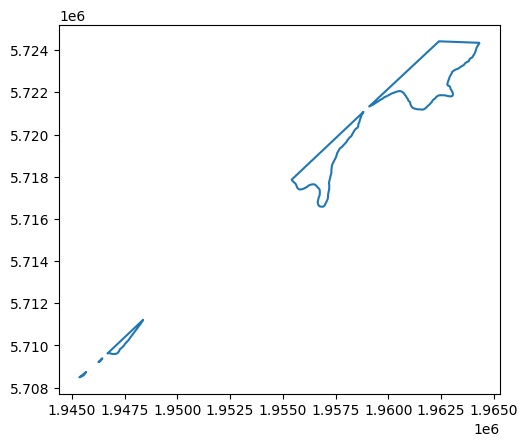

In [39]:
Te_Urewera_Subdivision_2193.boundary.plot()

In [40]:
#Es Geoserie
type(Te_Urewera_Subdivision_2193.boundary)

geopandas.geoseries.GeoSeries

In [41]:
# conversion
Te_Urewera_SubdivisionDF=Te_Urewera_Subdivision_2193.boundary.to_frame() 

# Nueva columna
Te_Urewera_SubdivisionDF['name']='Te Urewera Subdivision' 

# Renombrando el "0" (nombre de la columna) que vimos antes, como "geometry"
Te_Urewera_SubdivisionDF.rename(columns={0:'geometry'},inplace=True) 

#Set geometry
Te_Urewera_SubdivisionDF = Te_Urewera_SubdivisionDF.set_geometry('geometry')

# Verificando:
Te_Urewera_SubdivisionDF.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [42]:
Te_Urewera_SubdivisionDF.to_file(os.path.join("maps","Te_Urewera_Subdivision_2193.gpkg"), layer='border', driver="GPKG")

<Axes: >

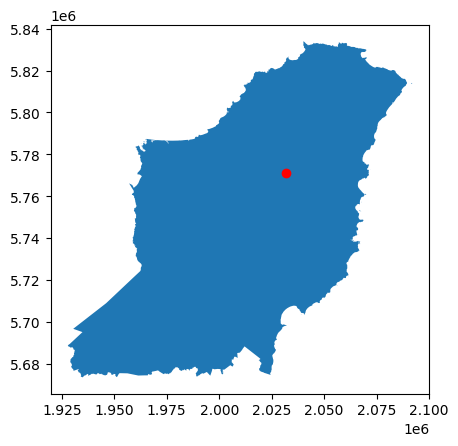

In [43]:
Gisborne2193=Gisborne.to_crs(2193).plot()
centroid_2193.plot(color='red',ax=Gisborne2193)

In [44]:
centroid_2193

,0
0,POINT (2031706.693 5771339.231)


In [45]:
type(centroid_2193)

geopandas.geodataframe.GeoDataFrame

C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]
C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]


<Axes: title={'center': 'Below Centroid'}>

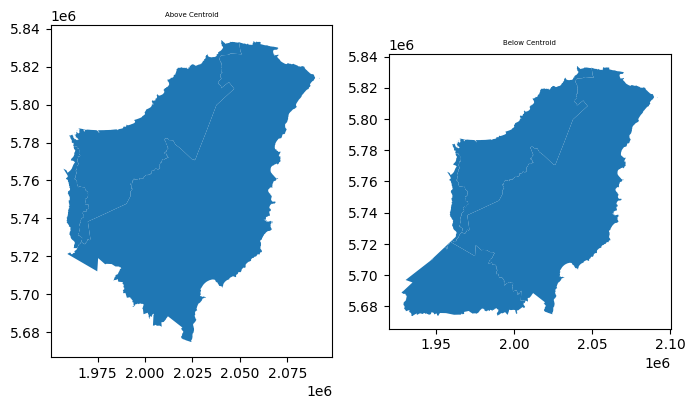

In [46]:
centroGisborne=centroid_2193


fig, axs = pyplot.subplots(ncols=2,sharex=False, sharey=False,figsize=(8,8))

axs[0].set_title('Above Centroid',fontsize=5)
clip_NewZea_subdivision_2193.cx[:,centroGisborne.geometry.y:].plot(ax=axs[0]) 

axs[1].set_title('Below Centroid',fontsize=5)
clip_NewZea_subdivision_2193.cx[:,:centroGisborne.geometry.y].plot(ax=axs[1]) 

In [47]:
clip_NewZea_subdivision_2193.cx[:,:centroGisborne.geometry.y]

C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]


,TASUB2019_,TASUB201_1,LAND_AREA_,AREA_SQ_KM,Shape_Leng,geometry
85,02999,Area Outside Subdivision,4077.222064,4130.199161,462387.552177,"MULTIPOLYGON (((1945390.507 5708499.517, 19455..."
80,02503,Te Urewera Subdivision,999.650754,999.650754,189904.634778,"MULTIPOLYGON (((1964333.598 5724348.186, 19643..."
84,02899,Area Outside Subdivision,8385.332019,8385.332019,690778.644100,"MULTIPOLYGON (((2030355.147 5780893.692, 20319..."
81,02599,Area Outside Subdivision,2404.765611,2419.479261,398877.912980,"MULTIPOLYGON (((1961914.753 5779745.975, 19619..."
83,02799,Area Outside Subdivision,3089.720490,3100.569110,481575.198808,"MULTIPOLYGON (((1982370.161 5786691.334, 19824..."


In [48]:
#Graficamos el norte de la región como polígono
Gisborne_bottom=clip_NewZea_subdivision_2193.cx[:,:centroGisborne.geometry.y].dissolve()
Gisborne_bottom

C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]


,geometry,TASUB2019_,TASUB201_1,LAND_AREA_,AREA_SQ_KM,Shape_Leng
0,"MULTIPOLYGON (((1945675.927 5708740.303, 19461...",02999,Area Outside Subdivision,4077.222064,4130.199161,462387.552177


In [49]:
#Ahora
Gisborne_bottom['zone']='S'
Gisborne_bottom=Gisborne_bottom.loc[:,['TASUB201_1','zone','geometry']]   
Gisborne_bottom

,TASUB201_1,zone,geometry
0,Area Outside Subdivision,S,"MULTIPOLYGON (((1945675.927 5708740.303, 19461..."


<Axes: >

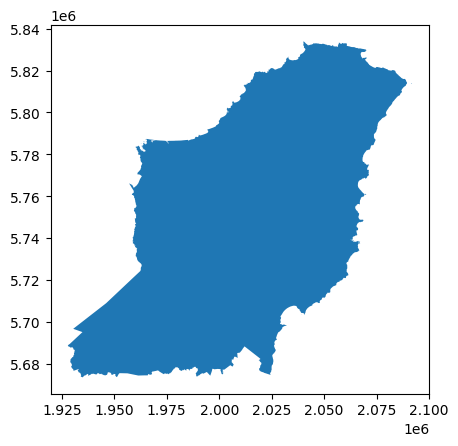

In [50]:
#Resultado
Gisborne_bottom.plot()

In [51]:
#Identificamos si la partición es exacta
rowsCX=(clip_NewZea_subdivision_2193.cx[:,:centroGisborne.geometry.y].shape[1],\
clip_NewZea_subdivision_2193.cx[:,:centroGisborne.geometry.y].shape[1])
sum(rowsCX)

C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]
C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]


12

In [52]:
#Observamos que no lo es, pues se repiten cierta cantidad de distritos
sum(rowsCX)-clip_NewZea_subdivision_2193.cx[:,:centroGisborne.geometry.y].shape[1]

C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\shapely\geometry\polygon.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(c) for c in o]


6

In [53]:
#Ejercicio 5
import pandas as pd 
infoairports=pd.read_csv(os.path.join("data","nz-airports.csv"))

# Algunas filas

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] 

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +name,#country +code +iso2,...,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,5023,NZAA,large_airport,Auckland International Airport,-37.01199,174.786331,23,OC,New Zealand,NZ,...,Auckland,1,NZAA,AKL,NaN,http://www.auckland-airport.co.nz/,https://en.wikipedia.org/wiki/Auckland_Interna...,NaN,51475,2022-03-29T22:03:00+00:00
2,5026,NZCH,large_airport,Christchurch International Airport,-43.48939895629883,172.53199768066406,123,OC,New Zealand,NZ,...,Christchurch,1,NZCH,CHC,NaN,http://www.christchurchairport.co.nz/,https://en.wikipedia.org/wiki/Christchurch_Int...,NaN,1275,2008-06-13T14:30:04+00:00
3,5063,NZWN,large_airport,Wellington International Airport,-41.3272018433,174.804992676,41,OC,New Zealand,NZ,...,Wellington,1,NZWN,WLG,NaN,http://www.wellingtonairport.co.nz/,https://en.wikipedia.org/wiki/Wellington_Inter...,NaN,1275,2010-02-12T14:03:11+00:00
278,429954,NZ-0082,closed,Puhipuhi Airstrip,-35.48307,174.26677,NaN,OC,New Zealand,NZ,...,Whakapara,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-09-19T13:23:24+00:00
279,429955,NZ-0083,closed,Gibbs Airstrip,-35.51644,174.24986,NaN,OC,New Zealand,NZ,...,Whakapara,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-09-19T13:28:36+00:00
280,44846,NZJR,heliport,Whangarei Hospital Helipad,-35.735078,174.303428,154,OC,New Zealand,NZ,...,Whangarei,0,NZJR,NaN,NaN,NaN,NaN,NaN,0,2022-09-15T15:53:59+00:00
281,429848,NZKN,heliport,Kensington Park Heliport,-35.704583,174.313041,131,OC,New Zealand,NZ,...,Whangarei,0,NZKN,NaN,NaN,NaN,NaN,NaN,0,2022-09-15T16:03:21+00:00


In [54]:
#Borrando la primera fila
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)

In [55]:
#Observando la información es los aeropuertos de Nueva Zelanda (sabiendo que Gisborne solo tiene uno)
infoairports[20:40]
#Observamos que pertence a la categoría de "medium_airport"

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
20,5042,NZNP,medium_airport,New Plymouth Airport,-39.00859832763672,174.1790008544922,97,OC,New Zealand,NZ,...,New Plymouth,1,NZNP,NPL,NaN,NaN,https://en.wikipedia.org/wiki/New_Plymouth_Air...,NaN,750,2009-08-23T20:04:23+00:00
21,5027,NZCI,medium_airport,Chatham Islands / Tuuta Airport,-43.81189,-176.46514,43,OC,New Zealand,NZ,...,Te One,1,NZCI,CHT,NaN,NaN,https://en.wikipedia.org/wiki/Chatham_Islands_...,Karewa,750,2021-10-14T17:26:57+00:00
22,5025,NZAR,medium_airport,Ardmore Airport,-37.029701232910156,174.97300720214844,111,OC,New Zealand,NZ,...,Manurewa,0,NZAR,AMZ,NaN,http://www.nzar.co.nz/,https://en.wikipedia.org/wiki/Ardmore_Airport,NaN,250,2009-08-10T09:17:52+00:00
23,5056,NZTU,medium_airport,Timaru Airport,-44.302799224853516,171.22500610351562,89,OC,New Zealand,NZ,...,NaN,1,NZTU,TIU,NaN,NaN,https://en.wikipedia.org/wiki/Richard_Pearse_A...,NaN,750,2008-06-13T14:30:04+00:00
24,5047,NZOU,medium_airport,Oamaru Airport,-44.970001220703125,171.08200073242188,99,OC,New Zealand,NZ,...,NaN,1,NZOU,OAM,NaN,NaN,https://en.wikipedia.org/wiki/Oamaru_Aerodrome,NaN,750,2008-06-13T14:30:04+00:00
25,5024,NZAP,medium_airport,Taupo Airport,-38.73970031738281,176.08399963378906,1335,OC,New Zealand,NZ,...,Taupo,1,NZAP,TUO,NaN,NaN,https://en.wikipedia.org/wiki/Taupo_Airport,NaN,750,2009-08-23T21:09:02+00:00
26,5046,NZOH,medium_airport,RNZAF Base Ohakea,-40.20600128173828,175.38800048828125,164,OC,New Zealand,NZ,...,NaN,0,NZOH,OHA,NaN,http://www.airforce.mil.nz/about/hqbases/boh.htm,https://en.wikipedia.org/wiki/RNZAF_Base_Ohakea,NaN,575,2008-07-18T11:42:11+00:00
27,30465,NZTL,small_airport,Tekapo Aerodrome,-44.0052986145,170.444000244,2496,OC,New Zealand,NZ,...,NaN,0,NZTL,NaN,NaN,http://www.airsafaris.co.nz/flights/Tekapo/,NaN,NaN,50,2012-06-06T14:51:36+00:00
28,30214,NZOM,small_airport,Omaka Blenheim Airport,-41.540000915527344,173.9219970703125,102,OC,New Zealand,NZ,...,Blenheim,0,NZOM,NaN,NaN,NaN,NaN,NaN,50,2009-08-23T20:55:24+00:00
29,5029,NZFI,small_airport,Feilding Airport,-40.25579833984375,175.60499572753906,214,OC,New Zealand,NZ,...,Feilding,0,NZFI,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Feilding_Aerodrome,NaN,50,2008-06-13T14:30:04+00:00


In [56]:
#Analizando el nombre de las columnas

infoairports.columns.to_list()

['id',
 'ident',
 'type',
 'name',
 'latitude_deg',
 'longitude_deg',
 'elevation_ft',
 'continent',
 'country_name',
 'iso_country',
 'region_name',
 'iso_region',
 'local_region',
 'municipality',
 'scheduled_service',
 'gps_code',
 'iata_code',
 'local_code',
 'home_link',
 'wikipedia_link',
 'keywords',
 'score',
 'last_updated']

In [57]:
#Mateniendo solo columnas de interés
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

In [58]:
#Analicemos lo que tenemos
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           281 non-null    object
 1   type           281 non-null    object
 2   latitude_deg   281 non-null    object
 3   longitude_deg  281 non-null    object
 4   elevation_ft   226 non-null    object
 5   region_name    281 non-null    object
 6   municipality   207 non-null    object
dtypes: object(7)
memory usage: 15.5+ KB


In [59]:
#Necesitamos formatear ciertas columnas:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# Ahora
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           281 non-null    object 
 1   type           281 non-null    object 
 2   latitude_deg   281 non-null    float64
 3   longitude_deg  281 non-null    float64
 4   elevation_ft   226 non-null    float64
 5   region_name    281 non-null    object 
 6   municipality   207 non-null    object 
dtypes: float64(3), object(4)
memory usage: 15.5+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

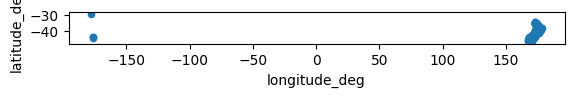

In [60]:
# Ahora

base = Gisborne.plot(color='white', edgecolor='black') #No proyectado

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [61]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=Gisborne.crs.to_epsg())# Las coordenadas estaban en grados - no proyectadas

<Axes: >

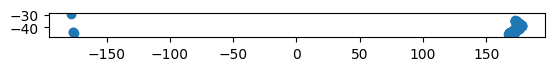

In [62]:
base = Gisborne.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [63]:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

In [64]:
#Vemos que podemos agregar al ejercicio 3, falta poner CRS
airports.geometry

0      POINT (174.78633 -37.01199)
1      POINT (172.53200 -43.48940)
2      POINT (174.80499 -41.32720)
3      POINT (168.73900 -45.02110)
4      POINT (170.19800 -45.92810)
                  ...             
276    POINT (174.23625 -35.45401)
277    POINT (174.26677 -35.48307)
278    POINT (174.24986 -35.51644)
279    POINT (174.30343 -35.73508)
280    POINT (174.31304 -35.70458)
Name: geometry, Length: 281, dtype: geometry

In [65]:
airports.crs="EPSG:4326"

In [66]:
#Ahora re-proyectamos
airports_2193=airports.to_crs(2193)

<Axes: >

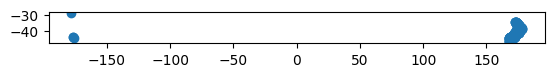

In [67]:
# Visualiza el GeoDataFrame con las geometrías transformadas
airports.plot()

In [68]:
airports_2193['type'].value_counts()

type
small_airport     164
heliport           62
medium_airport     35
closed             14
large_airport       3
seaplane_base       3
Name: count, dtype: int64

In [69]:
airports_2193.rename(columns={'type':'kind'},inplace=True)

In [70]:
from folium import LayerControl

m = airports_2193[airports_2193.kind=='small_airport'].explore(color="red",name="small",show=False)
m = airports_2193[airports_2193.kind=='medium_airport'].explore(m=m, color="blue",name="medium",show=False)
m = airports_2193[airports_2193.kind=='large_airport'].explore(m=m, color="black",name="large",show=True)
m = airports_2193[airports_2193.kind=='seaplane_base'].explore(m=m, color="green",name="seaplane",show=False)
m = airports_2193[airports_2193.kind=='closed'].explore(m=m, color="white",name="closed",show=False)
m = airports_2193[airports_2193.kind=='heliport'].explore(m=m, color="orange",name="heliport",show=False)

LayerControl(collapsed=False).add_to(m) 

m

In [71]:
airports_2193.to_file(os.path.join("maps","Nueva_Zelanda_2193.gpkg"),layer='airports', driver="GPKG")

In [72]:
#Ejercicio 6
Gisborne_bottom

,TASUB201_1,zone,geometry
0,Area Outside Subdivision,S,"MULTIPOLYGON (((1945675.927 5708740.303, 19461..."


<Axes: >

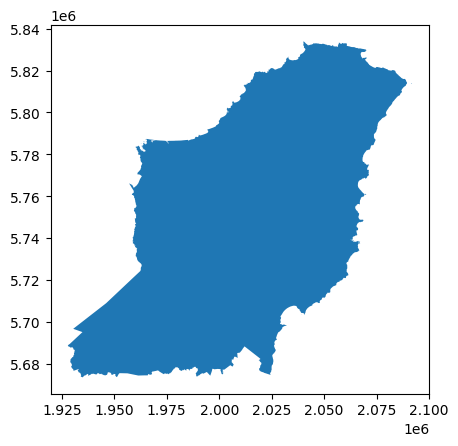

In [73]:
Gisborne_bottom.plot()

In [74]:
Gisborne_bottom.convex_hull

0    POLYGON ((1935050.380 5673757.601, 1934938.752...
dtype: geometry

<Axes: >

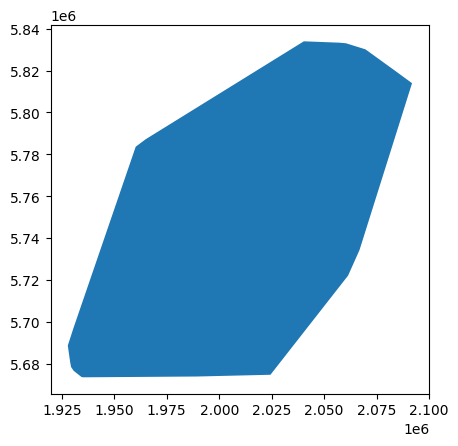

In [75]:
Gisborne_bottom.convex_hull.plot()

In [76]:
medium_airport =airports_2193[airports_2193.kind=='medium_airport']
# Muchas filas
medium_airport

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
3,Queenstown International Airport,medium_airport,-45.021099,168.738998,1171.0,Otago Region,Queenstown,POINT (1264291.109 5005867.448)
4,Dunedin International Airport,medium_airport,-45.928101,170.197998,4.0,Otago Region,Dunedin,POINT (1382756.350 4910122.882)
5,Nelson Airport,medium_airport,-41.298302,173.220993,17.0,Nelson Region,Nelson,POINT (1618501.809 5428104.177)
6,Rotorua Regional Airport,medium_airport,-38.109200,176.317001,935.0,Bay of Plenty Region,Rotorua,POINT (1890830.541 5776870.117)
7,Hawke's Bay Airport,medium_airport,-39.465801,176.869995,6.0,Hawke's Bay Region,Napier,POINT (1932950.419 5624377.745)
9,Hamilton International Airport,medium_airport,-37.866699,175.332001,172.0,Waikato Region,Hamilton,POINT (1805127.580 5806411.617)
10,Invercargill Airport,medium_airport,-46.412399,168.313004,5.0,Southland Region,Invercargill,POINT (1239800.351 4849447.496)
11,Wanaka Airport,medium_airport,-44.722954,169.248419,1142.0,Otago Region,Wanaka,POINT (1302894.308 5040975.611)
13,Palmerston North Airport,medium_airport,-40.320599,175.617004,151.0,Manawatu-Wanganui Region,Palmerston North,POINT (1822351.184 5533371.416)
14,Tauranga Airport,medium_airport,-37.671902,176.195999,13.0,Bay of Plenty Region,Tauranga,POINT (1881883.041 5825779.656)


In [77]:
medium_airport.unary_union
#Ahora tenemos un multipunto
gpd.GeoSeries(medium_airport.unary_union)

0    MULTIPOINT (1182277.246 4943887.931, 1239800.3...
dtype: geometry

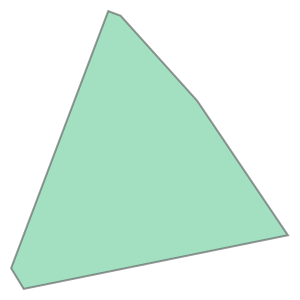

In [78]:
medium_airport.unary_union.convex_hull

In [79]:
type(medium_airport.unary_union.convex_hull)

shapely.geometry.polygon.Polygon

<Axes: >

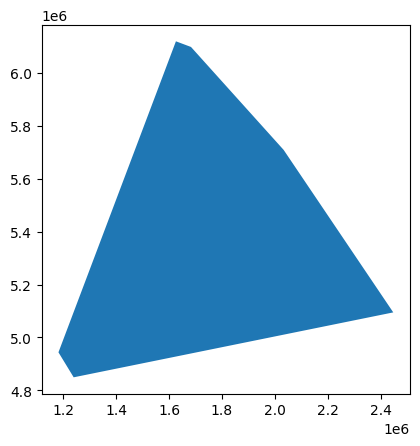

In [80]:
#También funciona para una Geoserie
gpd.GeoSeries(medium_airport.unary_union.convex_hull).plot()

In [81]:
# as gdf
Medium_airport_hull=gpd.GeoSeries(medium_airport.unary_union.convex_hull).to_frame()
Medium_airport_hull

,0
0,"POLYGON ((1239800.351 4849447.496, 1182277.246..."


In [82]:
#Le atribuimos el CRS que corresponde
Medium_airport_hull.rename(columns={0:'geometry'},inplace=True)
Medium_airport_hull['name']='medium airports hull' 
Medium_airport_hull=Medium_airport_hull.set_geometry('geometry')
Medium_airport_hull.crs="EPSG:2193"
# verifying:
Medium_airport_hull.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [83]:
zelanda_estados.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   nam       735 non-null    object  
 1   geometry  735 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 11.6+ KB


In [84]:
zelanda_estados.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [85]:
#Ponemos que zelanda_estados tenga crs
zelanda_estados.crs="EPSG:4326"

In [86]:
zelanda_estados.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [87]:
zelanda_estados.to_crs(2193).crs.axis_info

[Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [88]:
zelanda_estados2193=zelanda_estados.to_crs(2193)
zelanda_estados2193.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

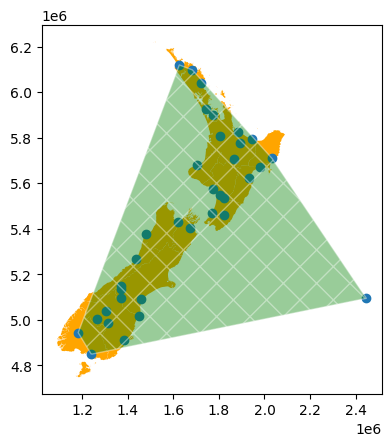

In [89]:
#Graficamos
base=zelanda_estados2193.plot(facecolor='orange')
medium_airport.plot(ax=base)
Medium_airport_hull.plot(ax=base,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')

In [90]:
Medium_airport_hull.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [91]:
Medium_airport_hull.explore()

In [92]:
#Ejercicio 7
# Analizaremos si los polígonos son válidos para ward y 
NewZea_ward_2193[~NewZea_ward_2193.is_valid]

,WARD2015_V,WARD2015_1,AREA_SQ_KM,LAND_AREA_,geometry


In [93]:
NewZea_subdivision_2193[~NewZea_subdivision_2193.is_valid]

,TASUB2019_,TASUB201_1,LAND_AREA_,AREA_SQ_KM,Shape_Leng,geometry


In [94]:
zelanda_estados[~zelanda_estados.is_valid]

,nam,geometry


In [95]:
Gisborne_bottom[~Gisborne_bottom.is_valid]

,TASUB201_1,zone,geometry
